<a href="https://colab.research.google.com/github/Mario-RJunior/calculadora-imoveis/blob/master/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados

Daremos início ao nosso estudo importando e posteriormente explorando os dados para compreendê-los melhor. A seguir faremos um tratamento dos dados e posteriormente iremos exportar estes dados para que possamos enfim utilizá-los para gerar um modelo de Machine Learning cujo objetivo é prever o valor de aluguel de imóveis na cidade de São Paulo.

## 1) Importando os dados

In [1]:
# Importanto as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Recuperando o link da base de dados gerada no estudo de web scraping
LINK = 'https://raw.githubusercontent.com/Mario-RJunior/web-scraping-ML/master/dados_imoveis.csv'

In [3]:
# Gerando o dataframe
df = pd.read_csv(LINK)
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,zona,quartos,area,preco
0,norte,2,65.0,2500
1,norte,3,65.0,1500
2,norte,2,50.0,1550
3,norte,2,35.0,1100
4,norte,1,59.0,1250


In [5]:
# Verificando dados estatísticos
df.describe()

,quartos,area,preco
count,1056.000000,1055.000000,1056.000000
mean,1.882576,76.386730,3262.014205
std,0.712408,68.787605,27373.632407
min,1.000000,11.000000,500.000000
25%,1.000000,46.000000,1370.000000
50%,2.000000,60.000000,1900.000000
75%,2.000000,80.000000,2800.000000
max,5.000000,1000.000000,890000.000000


In [6]:
# Verificando valores nulos
df.isna().sum()

zona       0
quartos    0
area       1
preco      0
dtype: int64

In [7]:
# Verificando os tipos das variáveis
df.dtypes

zona        object
quartos      int64
area       float64
preco        int64
dtype: object

In [8]:
# Verificando a correlação
df.corr()

,quartos,area,preco
quartos,1.000000,0.520210,0.113784
area,0.520210,1.000000,0.183883
preco,0.113784,0.183883,1.000000


## 2) Análise Exploratória dos Dados e Preprocessamento

Podemos agora fazer alguns gráficos para entendermos os dados. Para isso, iremos separar a base de dados entre base de treino e de teste e por fim cumprir as etapas de preprocessamentos em cada uma separadamente.

In [9]:
# Divisão da base entre treino e teste
treino, teste = train_test_split(df, 
                                 stratify=df['zona'], 
                                 test_size=0.25, 
                                 random_state=0)

In [10]:
print(f'Base de treino {treino.shape} \nBase de teste: {teste.shape}')

Base de treino (792, 4) 
Base de teste: (264, 4)


- Base de treino

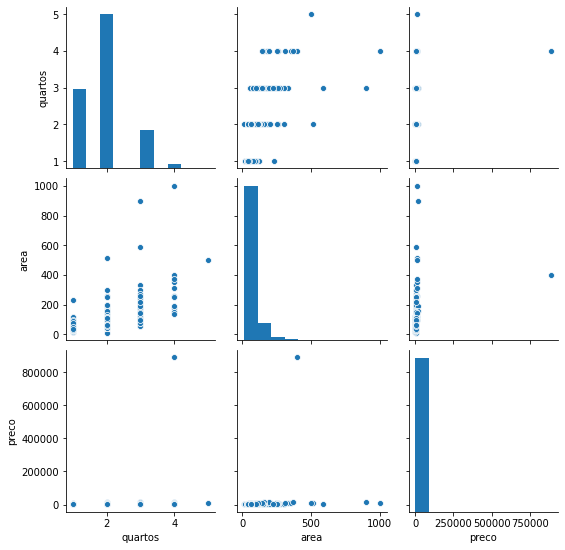

In [11]:
# Distplot com os dados originais
sns.pairplot(data=treino)
plt.show()

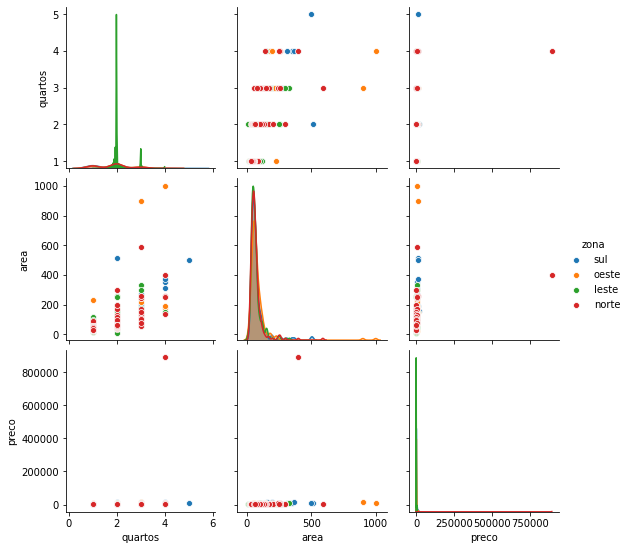

In [12]:
# Distplot com os dados originais
sns.pairplot(data=treino, hue='zona')
plt.show()

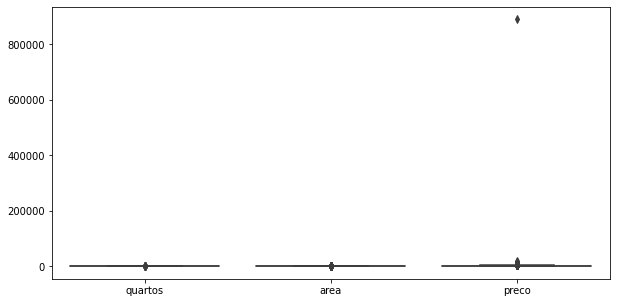

In [13]:
# Boxplot com os dados originais de treino
fig = plt.figure(figsize=(10,5))
sns.boxplot(data=treino)
plt.show()

### 2.1) Tratamento de valores missing

In [14]:
colunas = ['quartos', 'area', 'preco']
treino_num = treino[colunas]

In [15]:
# Preenchendo valores NaN
treino_medianas = treino_num.median()
treino_num = treino_num.fillna(treino_medianas)

In [16]:
# Verificando valores nulos para base de treino
treino_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 515 to 180
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quartos  792 non-null    int64  
 1   area     792 non-null    float64
 2   preco    792 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 24.8 KB


In [17]:
# Transformando dados em escala logarítmica
treino_num = treino_num.apply(np.log1p)

In [18]:
treino_num.head()

,quartos,area,preco
515,1.098612,4.330733,7.467942
991,1.098612,4.465908,8.108021
751,1.098612,4.189655,7.390799
769,1.098612,3.713572,6.769642
148,1.098612,4.189655,7.438972


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


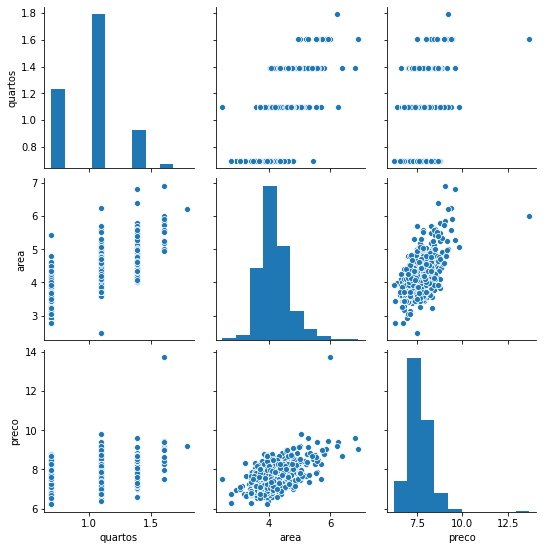

In [19]:
treino[colunas] = treino_num
sns.pairplot(data=treino)
plt.show()

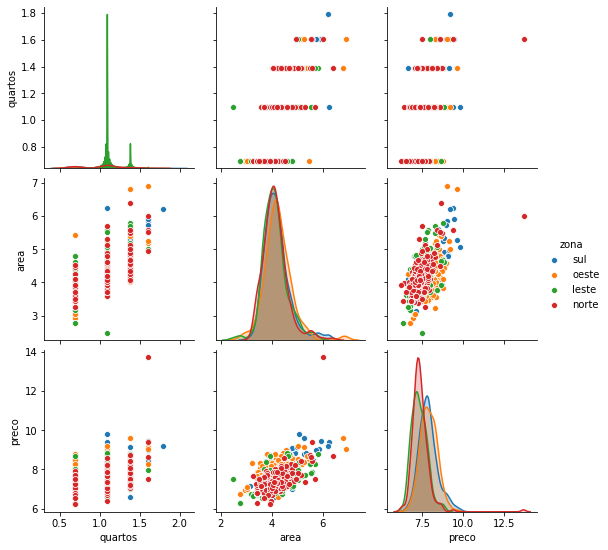

In [20]:
sns.pairplot(data=treino, hue='zona')
plt.show()

### 2.2) Análise de outliers

Iremos agora remover os outliers do nosso dataframe.

In [21]:
# Análise de outliers

REMOVER_OUTLIERS = False

quartis = treino_num.quantile([0.25,0.5,0.75])

Q1 = quartis.loc[0.25]
Q3 = quartis.loc[0.75]
IQR = Q3-Q1

k = 1.5 
limite_inferior = Q1-k*IQR
limite_superior = Q1+k*IQR

treino_num_sem_outlier = treino_num[treino_num>=limite_inferior].dropna()
treino_num_sem_outlier = treino_num_sem_outlier[treino_num_sem_outlier<=limite_superior].dropna()

if REMOVER_OUTLIERS:
  treino = treino.loc[treino_num_sem_outlier.index]

treino_num_sem_outlier

,quartos,area,preco
515,1.098612,4.330733,7.467942
991,1.098612,4.465908,8.108021
751,1.098612,4.189655,7.390799
769,1.098612,3.713572,6.769642
148,1.098612,4.189655,7.438972
...,...,...,...
224,1.098612,4.077537,7.378384
729,1.098612,3.713572,6.769642
842,0.693147,3.688879,7.601402
855,1.098612,4.094345,7.937732


Repetindo o pairplot para os dados em escala logarítmica.

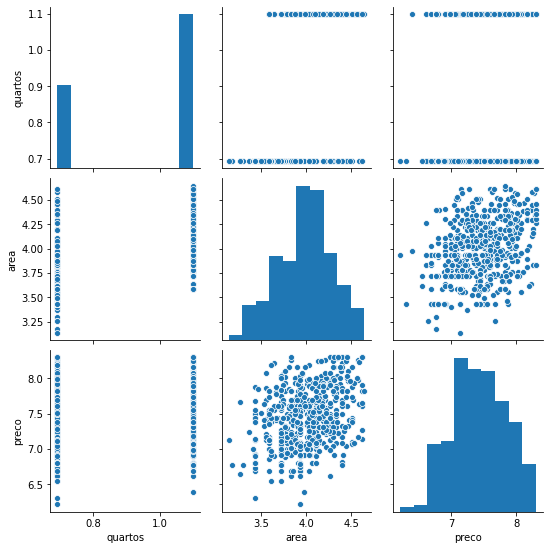

In [22]:
sns.pairplot(data=treino_num_sem_outlier)
plt.show()

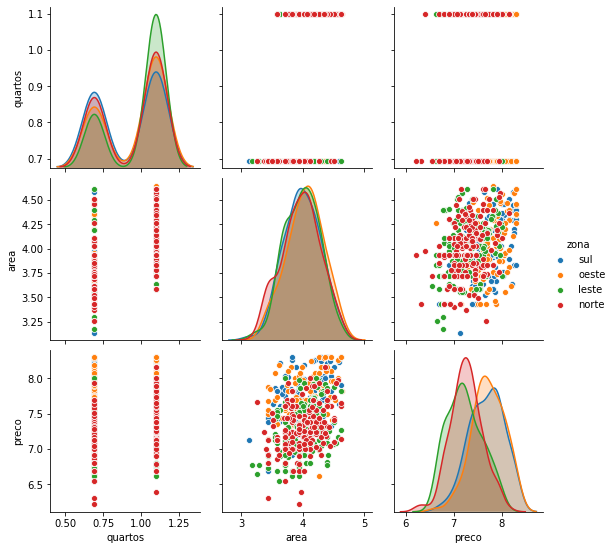

In [23]:
sns.pairplot(treino.loc[treino_num_sem_outlier.index], hue='zona')
plt.show()

### 2.3) Tratamento de colunas categóricas

Agora devemos dar uma atenção especial à coluna categórica "zona". Uma vez que nosso dataframe será submetido à algorítmos de machine learning que utilizam cálculos matemáticos para busca de padrões, não podemos deixar colunas com dados no formato object (ou seja, do tipo string).Essas variáveis são chamadas ***dummy*** e o processo de conversão nestas variáveis é chamado ***One-Hot Encoding***.

In [24]:
# Criando variáveis dummy
treino = pd.get_dummies(treino)
treino.head()

,quartos,area,preco,zona_leste,zona_norte,zona_oeste,zona_sul
515,1.098612,4.330733,7.467942,0,0,0,1
991,1.098612,4.465908,8.108021,0,0,1,0
751,1.098612,4.189655,7.390799,1,0,0,0
769,1.098612,3.713572,6.769642,1,0,0,0
148,1.098612,4.189655,7.438972,0,1,0,0


### 2.4) Preprocessamento para base de teste

- Valores missing

In [25]:
teste.isnull().sum()

zona       0
quartos    0
area       0
preco      0
dtype: int64

In [26]:
teste = teste.fillna(treino_medianas)
teste.head()

,zona,quartos,area,preco
964,oeste,2,56.0,2900
819,oeste,1,70.0,2700
593,leste,2,102.0,8500
167,norte,3,100.0,2270
1027,oeste,2,65.0,2220


- Transformação para escala logarítmica

In [27]:
teste[colunas] = teste[colunas].apply(np.log1p)
teste.head()

,zona,quartos,area,preco
964,oeste,1.098612,4.043051,7.972811
819,oeste,0.693147,4.262680,7.901377
593,leste,1.098612,4.634729,9.047939
167,norte,1.386294,4.615121,7.727976
1027,oeste,1.098612,4.189655,7.705713


- Variáveis categóricas

In [28]:
teste = pd.get_dummies(teste)
teste.head()

,quartos,area,preco,zona_leste,zona_norte,zona_oeste,zona_sul
964,1.098612,4.043051,7.972811,0,0,1,0
819,0.693147,4.262680,7.901377,0,0,1,0
593,1.098612,4.634729,9.047939,1,0,0,0
167,1.386294,4.615121,7.727976,0,1,0,0
1027,1.098612,4.189655,7.705713,0,0,1,0


2.5) Exportar treino e teste preprocessado

In [29]:
treino.to_csv('treino_preprocessado.csv', index=False)

In [30]:
teste.to_csv('teste_preprocessado.csv', index=False)